# Adversarial Search: Playing "Mean" Connect 4


## Instructions

Name: Cody Lam

I understand that my submission needs to be my own work: yes

Points: 10


---



Complete this notebook and submit it (save/print as pdf). The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play "Mean" Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

> **The mean part:** This game has an additional rule. Every time it is a player's turn, the player can decide to instead of playing a new disk, take a bottom row disk of the opponent and place it back in the top of the same column. All disks above the removed disk will fall down one position and the removed one will be placed on top. Note that a player can only move an _opponent's disc_ that is in the _bottom row_ of the board. **Further, you are not allowed to play a mean move if your opponent just played one.** This ensures the game will end at some point. This also may affect the definition of a state, compared with standard Connect 4.

If a mean move causes both players to win, the game immediately ends and it is a tie, even if one player has more connect-4s than the other one. If a mean move causes one player to win, then the game also ends and the player with the connect-4 is the winner.

Note that normal [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [1 point]

Define the components of the search problem associated with this game:

* Initial state
* Actions
* Transition model
* Test for the terminal state
* Utility for terminal states

In [ ]:
# Your code/answer goes here.
"""
- Intial State: The game will start with an empty 7-column, 6-row grid, Player 1 (X) and Player 2 (O) takes
turns.
- Actions: Each player has two types of moves, Drop Move and Mean Move. The Drop Move is the standard move
where the player can drop a piece in one of the 7 columns and the piece will fall to the lowest available
row in the selected column. The Mean Move is when the opponent has a piece from the bottom row of the column
and they can move that piece to the top of the same column. The rest of the column's pieces are shifted down
and the move is only allowed if the previous move was not a mean move. Action representation can be (D,c)
which means the player used a drop move in column c. (M, c) means it is a mean move in column c.
- Transition Model: Drop Move (D, c) the player's disc is placed in the lowest available row in the column c
Mean Move (M,c), the opponent's bottom-most disc in column c is removed and placed on the top, a flag is marked
that a mean move was just played.
- Test for terminal state:
- Utility for terminal states:
"""

How big is the state space? Give an estimate and explain it.

In [ ]:
# Your code/ answer goes here.
"""
The board is 7 columns x 6 rows which is equal to 42 cells, each cell can be empty, occupied by Player X, or
occupied by Player O
"""

How big is the game tree that minimax search will go through? Give an estimate and explain it.

In [ ]:
# Your code/ answer goes here.

## Task 2: Game Environment and Random Agent [3 point]

You can use a numpy character array as the board. Note that the following function can create boards of different sizes.

In [2]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


Instead of colors (red and yellow), you can use 1 and -1 to represent the players Max and Min. Make sure that your agent functions all have the from: `agent_type(state, player = 1)`, where board is the current board position and player is the player (1, -1) whose next move it is and who the agent should play.

Visualization code by Randolph Rankin:

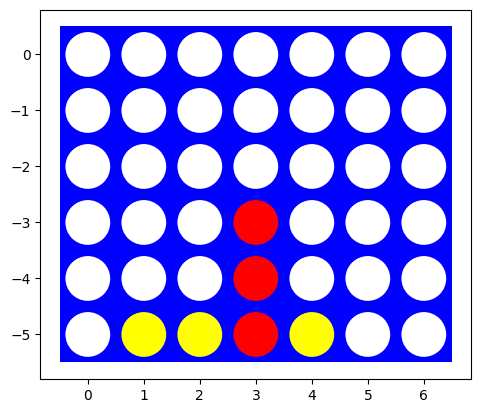

In [3]:
import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]

visualize(board)

Implement helper functions for:

* The transition model $result(s, a)$.
* The utility function $utility(s)$.
* Check for terminal states $terminal(s)$.
* A check for available actions in each state $actions(s)$.

Make sure that all these functions work with boards of different sizes (number of columns and rows).

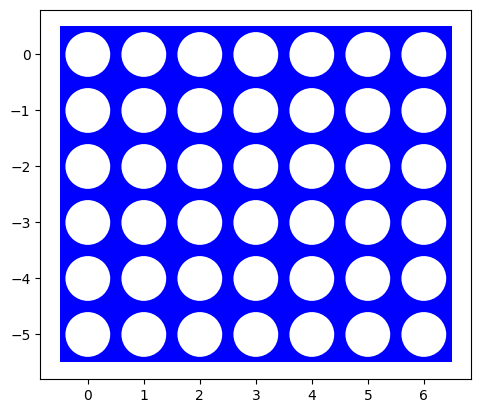

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
None


AttributeError: 'NoneType' object has no attribute 'shape'

In [11]:
import random

# Get avaliable actions
def actions(state, last_mean_move):
  available_moves = []
  print(state)
  rows, cols = state.shape

  # Action for Drop moves
  for col in range(cols):
    if state[0, col] == 0:
      available_moves.append(("D", col))
  # Action for Mean moves
  if not last_mean_move:
    for col in range(cols):
      if state[-1, col] != 0:
        available_moves.append(("M", col))
  return available_moves

# Transition model: Apply a move and return a new board state
def result(state, action, player):
  new_state = state.copy()
  move_type, col = action

  if move_type == 'D':
    for row in range(len(state) - 1, -1, -1):
      if new_state[row, col] == 0:
        new_state[row,col] = player
        break

  elif move_type == 'M':
    bottom_piece = new_state[-1, col]

def terminal(state):
  rows, cols = state.shape

  def check_win(player):
    # Checks Horizontal
    for r in range(rows):
      for c in range(cols - 3):
        if np.all(state[r, c:c + 4] == player):
          return True

    # Checks Vertical
    for r in range(rows - 3):
      for c in range(cols):
        if np.all(state[r:r+4, c] == player):
          return True

    # Checks diagnols
    for r in range(rows - 3):
      for c in range(cols - 3):
        if np.all(state[r + i, c + i] == player for i in range(4)):
          return True
        if np.all([state[r + 3 - i, c + i] == player for i in range(4)]):
          return True
    return False

  if check_win(1) and check_win(-1):
      return True, 0
  # Player 1 wins
  elif check_win(1):
      return True, 1
  # Player 2 wins
  elif check_win(-1):
      return True, -1

  # If the Board is full
  if np.all(state != 0):
      return True, 0

  return False, None # Game is still going

def utility(state):
  is_terminal, winner = terminal(state)
  # Game is not over
  if not is_terminal:
    return None
  # Return the winner
  return winner

board = empty_board()
visualize(board)
print(board)
player = 1  # Start with player 1
last_mean_move = False

def random_agent(state, player, last_mean_move=False):
    possible_moves = actions(state, last_mean_move)
    if not possible_moves:
        return None  # No valid moves (should not happen in normal gameplay)
    return random.choice(possible_moves)

for _ in range(10):  # Simulate 10 moves
    move = random_agent(board, player, last_mean_move)
    if not move:
        break
    board = result(board, move, player)
    last_mean_move = move[0] == "M"
    player *= -1  # Switch players



Implement an agent that plays randomly. Make sure the agent function receives as the percept the game state and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(state, player = None): ...`

The argument `player` is used for agents that do not store what side they are playing. The value passed on by the environment should be 1 ot -1 for playerred and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [ ]:
# Your code/ answer goes here.
def random_player(state, player=None):
  return None

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [ ]:
# Your code/ answer goes here.

## Task 3: Minimax Search with Alpha-Beta Pruning [3 points]

### Implement the search starting.

Implement the search starting from a given state and specifying the player and put it into an agent function.
You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).

__Notes:__
* Make sure that all your agent functions have a signature consistent with the random agent above.
* The search space for a $6 \times 7$ board is large. You can experiment with smaller boards (the smallest is $4 \times 4$) and/or changing the winning rule to connect 3 instead of 4.

In [ ]:
# Your code/ answer goes here.

Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

In [ ]:
# Your code/ answer goes here.

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [ ]:
# Your code/ answer goes here.

### Move ordering

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move.

In [ ]:
# Your code/ answer goes here.

### The first few moves

Start with an empty board. This is the worst case scenario for minimax search with alpha-beta pruning since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

In [ ]:
# Your code/ answer goes here.

### Playtime

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [ ]:
# Your code/ answer goes here.

## Task 4: Heuristic Alpha-Beta Tree Search [3 points]

### Heuristic evaluation function

Define and implement a heuristic evaluation function.

In [ ]:
# Your code/ answer goes here.

### Cutting off search

Modify your Minimax Search with Alpha-Beta Pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [ ]:
# Your code/ answer goes here.

Experiment with the same manually created boards as above to check if the agent spots winning opportunities.

In [ ]:
# Your code/ answer goes here.

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [ ]:
# Your code/ answer goes here.

### Playtime

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [ ]:
# Your code/ answer goes here.

---
Assignment adapted from [Michael Hahsler](https://github.com/mhahsler/CS7320-AI) under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/deed.en) license.
